In [1]:
#Classification problem
# loosely following https://www.learnpytorch.io/02_pytorch_classification/
# with help from:
# https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#sphx-glr-beginner-blitz-neural-networks-tutorial-py
# and Andrej Karpathy's youtube channel. 

# This version uses Kaiming He /Xavier type scaling of the normal distribution for initialisation and zero bias. 
# Compared to the two identical instances of the model with default initialisations, this initialisation
# converges the model to 100% accuracy on train and validation with 2/3 to a half the number of epochs, 
# and the model trained for the same number of steps has a much smoother decision boundary. 
from sklearn.datasets import make_circles
import numpy


# Make 1000 samples 
n_samples = 1000

# Create circles
X, Y = make_circles(n_samples,
                    noise=0.03, # a little bit of noise to the dots
                    random_state=42) # keep random state so we get the same val
print(X)
print(Y)



[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 ...
 [-0.13690036 -0.81001183]
 [ 0.67036156 -0.76750154]
 [ 0.28105665  0.96382443]]
[1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1
 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1
 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1
 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0
 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1
 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1
 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1
 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0
 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1
 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1
 0 0 1 

In [2]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
    "X2": X[:, 1],
    "label": Y
})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


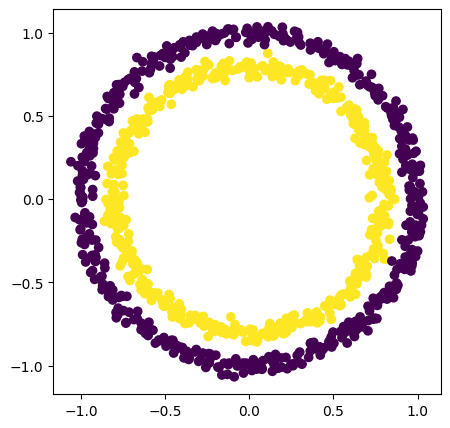

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()


In [5]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [6]:
import torch
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [7]:
import torch
X = torch.from_numpy(X).type(torch.float)
Y = torch.from_numpy(Y).type(torch.float)

# View the first five samples
X[:5], Y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [8]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

# 0.2 test; 0.8 train and subsequently split test again into validation
# and test. 
X_train, X_test, Y_train, Y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size=0.2)



In [9]:

# split the test set into  0.5 test and 0.5 validation; i.e. 10% of 
# original data
X_val, X_test, Y_val, Y_test = train_test_split(X, 
                                                Y, 
                                                test_size=0.5, 
                                                random_state=42) 

len(X_train), len(X_test), len(Y_train), len(Y_test), len(Y_val), len(X_val)

(800, 500, 800, 500, 500, 500)

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.manual_seed(42)

class binary_classification_concentric_circles(nn.Module):
    def __init__(self):
        super().__init__()
        self.l0 = nn.Linear(2,10) # nn.Linear(input_nodes, output_nodes)
        #self.l1 = nn.Linear(10,10)
        self.l2 = nn.Linear(10,10) 
        self.l3 = nn.Linear(10,1) # output logit of probability of class 1. 

        nn.init.kaiming_normal_(self.l0.weight, \
                                mode='fan_in', \
                                nonlinearity='relu')
        nn.init.constant_(self.l0.bias, 0.0)
        nn.init.kaiming_normal_(self.l2.weight, \
                                mode='fan_in', \
                                nonlinearity='relu')
        nn.init.constant_(self.l2.bias, 0.0)
        nn.init.kaiming_normal_(self.l3.weight, \
                                mode='fan_in', \
                                nonlinearity='linear')
        nn.init.constant_(self.l3.bias, 0.0)
  


    def forward(self, X):
        x = self.l0(X)
        #x = self.l1(x)
        x = F.relu(x)
        x = self.l2(x)
        x = F.relu(x)
        x = self.l3(x)
        return x
        #return self.l2(self.relu(self.l1(self.l0(X))))
    
classify_conc_circles = binary_classification_concentric_circles().to(device)
print(classify_conc_circles)

binary_classification_concentric_circles(
  (l0): Linear(in_features=2, out_features=10, bias=True)
  (l2): Linear(in_features=10, out_features=10, bias=True)
  (l3): Linear(in_features=10, out_features=1, bias=True)
)


In [11]:
X_train[0:5], X_train[0:5].shape

(tensor([[ 0.9135,  0.2403],
         [ 0.1049,  1.0081],
         [ 0.1765,  0.9797],
         [ 0.2975,  0.7461],
         [ 0.7584, -0.7182]]),
 torch.Size([5, 2]))

In [12]:
classify_conc_circles.state_dict()["l0.weight"].shape

torch.Size([10, 2])

In [13]:
classify_conc_circles.l0.weight.shape

torch.Size([10, 2])

In [14]:
# manually run through network with one X input
l0_out = torch.matmul(X_train[0:5],torch.transpose(classify_conc_circles.state_dict()["l0.weight"], 0, 1) )
l0_out, X_train[0:5]

(tensor([[ 0.3455, -0.9162,  0.7100, -0.0947, -0.3477, -0.0834, -0.0883, -0.9705,
           0.6092, -1.8344],
         [ 1.0608, -2.3539, -1.1888, -0.5850, -0.0048, -0.7996, -1.1462, -0.4791,
          -0.4387, -2.0998],
         [ 1.0387, -2.3174, -1.0720, -0.5647, -0.0337, -0.7680, -1.0984, -0.5375,
          -0.3665, -2.1526],
         [ 0.8080, -1.8299, -0.6340, -0.4219, -0.0893, -0.5652, -0.8025, -0.5665,
          -0.1480, -1.8841],
         [-0.6688,  1.3439,  1.7783,  0.4586, -0.3215,  0.6701,  0.9899, -0.4615,
           0.9818,  0.2452]]),
 tensor([[ 0.9135,  0.2403],
         [ 0.1049,  1.0081],
         [ 0.1765,  0.9797],
         [ 0.2975,  0.7461],
         [ 0.7584, -0.7182]]))

In [15]:
# start again. Access the weights/biases directly, not through state_dict

In [16]:
# multiply weights: this should give the same as the above cell
l0_out = torch.matmul(X_train[0:100],torch.transpose(classify_conc_circles.l0.weight, 0, 1) )
l0_out[0:15]

tensor([[ 3.4550e-01, -9.1620e-01,  7.0997e-01, -9.4746e-02, -3.4767e-01,
         -8.3417e-02, -8.8346e-02, -9.7045e-01,  6.0916e-01, -1.8344e+00],
        [ 1.0608e+00, -2.3539e+00, -1.1888e+00, -5.8496e-01, -4.7985e-03,
         -7.9955e-01, -1.1462e+00, -4.7912e-01, -4.3873e-01, -2.0998e+00],
        [ 1.0387e+00, -2.3174e+00, -1.0720e+00, -5.6474e-01, -3.3747e-02,
         -7.6804e-01, -1.0984e+00, -5.3749e-01, -3.6647e-01, -2.1526e+00],
        [ 8.0799e-01, -1.8299e+00, -6.3397e-01, -4.2185e-01, -8.9316e-02,
         -5.6520e-01, -8.0249e-01, -5.6650e-01, -1.4804e-01, -1.8841e+00],
        [-6.6884e-01,  1.3439e+00,  1.7783e+00,  4.5863e-01, -3.2150e-01,
          6.7009e-01,  9.8986e-01, -4.6153e-01,  9.8178e-01,  2.4515e-01],
        [ 8.3349e-01, -1.8094e+00, -1.2285e+00, -4.8532e-01,  8.9106e-02,
         -6.7573e-01, -9.7704e-01, -1.5792e-01, -5.4653e-01, -1.3411e+00],
        [-5.3090e-01,  1.0702e+00,  1.3863e+00,  3.6184e-01, -2.4722e-01,
          5.2782e-01,  7.7915e-0

shape:  torch.Size([100, 10])
first 10 values:  tensor([[ 3.4550e-01, -9.1620e-01,  7.0997e-01, -9.4746e-02, -3.4767e-01,
         -8.3417e-02, -8.8346e-02, -9.7045e-01,  6.0916e-01, -1.8344e+00],
        [ 1.0608e+00, -2.3539e+00, -1.1888e+00, -5.8496e-01, -4.7985e-03,
         -7.9955e-01, -1.1462e+00, -4.7912e-01, -4.3873e-01, -2.0998e+00],
        [ 1.0387e+00, -2.3174e+00, -1.0720e+00, -5.6474e-01, -3.3747e-02,
         -7.6804e-01, -1.0984e+00, -5.3749e-01, -3.6647e-01, -2.1526e+00],
        [ 8.0799e-01, -1.8299e+00, -6.3397e-01, -4.2185e-01, -8.9316e-02,
         -5.6520e-01, -8.0249e-01, -5.6650e-01, -1.4804e-01, -1.8841e+00],
        [-6.6884e-01,  1.3439e+00,  1.7783e+00,  4.5863e-01, -3.2150e-01,
          6.7009e-01,  9.8986e-01, -4.6153e-01,  9.8178e-01,  2.4515e-01],
        [ 8.3349e-01, -1.8094e+00, -1.2285e+00, -4.8532e-01,  8.9106e-02,
         -6.7573e-01, -9.7704e-01, -1.5792e-01, -5.4653e-01, -1.3411e+00],
        [-5.3090e-01,  1.0702e+00,  1.3863e+00,  3.6184e-0

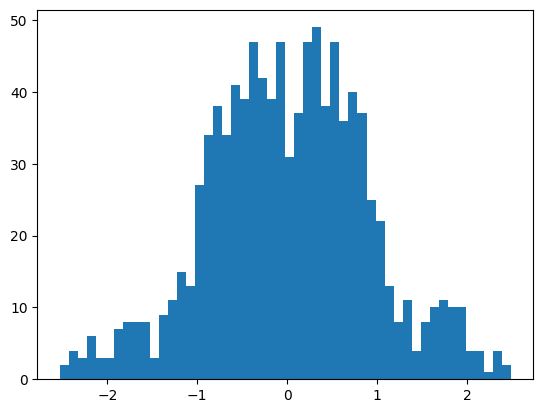

In [17]:

print("shape: ", l0_out.shape)
print("first 10 values: ", l0_out[0:10])
plt.hist(l0_out.view(-1).tolist(),50);

tensor([[ 3.4550e-01, -9.1620e-01,  7.0997e-01, -9.4746e-02, -3.4767e-01,
         -8.3417e-02, -8.8346e-02, -9.7045e-01,  6.0916e-01, -1.8344e+00],
        [ 1.0608e+00, -2.3539e+00, -1.1888e+00, -5.8496e-01, -4.7985e-03,
         -7.9955e-01, -1.1462e+00, -4.7912e-01, -4.3873e-01, -2.0998e+00],
        [ 1.0387e+00, -2.3174e+00, -1.0720e+00, -5.6474e-01, -3.3747e-02,
         -7.6804e-01, -1.0984e+00, -5.3749e-01, -3.6647e-01, -2.1526e+00],
        [ 8.0799e-01, -1.8299e+00, -6.3397e-01, -4.2185e-01, -8.9316e-02,
         -5.6520e-01, -8.0249e-01, -5.6650e-01, -1.4804e-01, -1.8841e+00],
        [-6.6884e-01,  1.3439e+00,  1.7783e+00,  4.5863e-01, -3.2150e-01,
          6.7009e-01,  9.8986e-01, -4.6153e-01,  9.8178e-01,  2.4515e-01],
        [ 8.3349e-01, -1.8094e+00, -1.2285e+00, -4.8532e-01,  8.9106e-02,
         -6.7573e-01, -9.7704e-01, -1.5792e-01, -5.4653e-01, -1.3411e+00],
        [-5.3090e-01,  1.0702e+00,  1.3863e+00,  3.6184e-01, -2.4722e-01,
          5.2782e-01,  7.7915e-0

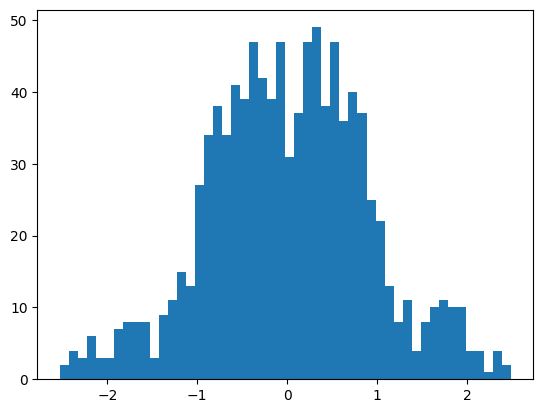

In [18]:
# add bias l0
l0_out = l0_out + classify_conc_circles.l0.bias
plt.hist(l0_out.view(-1).tolist(),50);
l0_out[0:15]

(tensor([[0.3455, 0.0000, 0.7100, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.6092,
          0.0000],
         [1.0608, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [1.0387, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.8080, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.0000, 1.3439, 1.7783, 0.4586, 0.0000, 0.6701, 0.9899, 0.0000, 0.9818,
          0.2452],
         [0.8335, 0.0000, 0.0000, 0.0000, 0.0891, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.0000, 1.0702, 1.3863, 0.3618, 0.0000, 0.5278, 0.7792, 0.0000, 0.7620,
          0.2211],
         [0.0000, 0.5788, 0.0000, 0.0000, 0.3777, 0.0000, 0.0000, 0.9714, 0.0000,
          1.6237],
         [0.0000, 0.3310, 0.0000, 0.0000, 0.3633, 0.0000, 0.0000, 0.8895, 0.0000,
          1.3619],
         [0.0000, 1.3547, 0.0000, 0.2361, 0.2644, 0.2878, 0.3890, 0.8688, 0.0000,
         

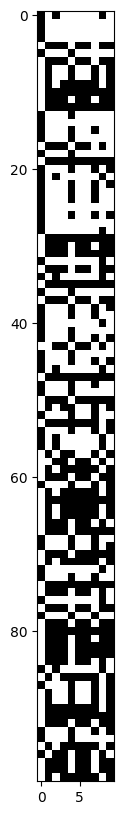

In [19]:
# relu l0
l0_relu = F.relu(l0_out)
# initialisations look heavily weighted to 0, which 
# is possibly going to give us lots of dead Relus!
plt.figure(figsize = (20, 10))
plt.imshow(l0_relu.abs() <= 0 , cmap='gray') # Booleanfrom conditional
l0_relu[0:15], l0_relu.shape, classify_conc_circles.l2.weight.shape

In [20]:
print("classify_conc_circles.l2.bias",  classify_conc_circles.l2.bias)

classify_conc_circles.l2.bias Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)


tensor([[-0.3360, -0.1343, -0.2831,  0.5081, -0.0052,  0.1159, -0.2663, -0.1106,
         -0.3539,  0.6966],
        [-0.3729,  0.1123,  0.1544,  0.5126, -0.3719,  0.1432, -0.1050,  0.2674,
         -0.4098, -0.0613],
        [-0.3652,  0.1100,  0.1512,  0.5019, -0.3641,  0.1402, -0.1028,  0.2618,
         -0.4013, -0.0600],
        [-0.2841,  0.0856,  0.1176,  0.3904, -0.2832,  0.1090, -0.0800,  0.2036,
         -0.3121, -0.0467],
        [-1.3091, -1.0964, -1.0606, -0.0195,  0.0755,  0.4717,  0.7245, -1.5777,
         -0.0797,  2.4982],
        [-0.3166,  0.1724,  0.0604,  0.4824, -0.3210,  0.1235, -0.0856,  0.2306,
         -0.3086, -0.0381],
        [-1.0319, -0.8708, -0.8381, -0.0290,  0.0479,  0.3750,  0.5734, -1.2379,
         -0.0578,  1.9667],
        [ 0.0387,  0.2152, -0.6224, -0.0135, -1.5946,  0.6161,  0.0690, -0.4782,
         -0.1901,  0.8195],
        [ 0.1184,  0.3087, -0.4872,  0.1532, -1.4561,  0.5313, -0.0108, -0.3397,
         -0.2282,  0.7410],
        [-0.3253, -

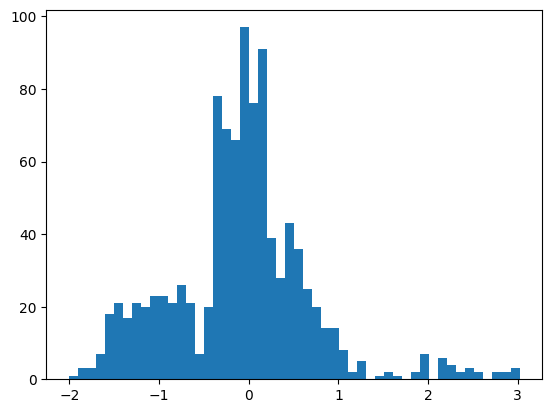

In [21]:
# multiply, add bias for l2 - l1 has been commented out of the model
l2_out = torch.matmul(l0_relu, \
                      torch.transpose(classify_conc_circles.l2.weight, 0, 1) )
l2_out = l2_out + classify_conc_circles.l2.bias
l0_out = l0_out + classify_conc_circles.l0.bias
plt.hist(l2_out.view(-1).tolist(),50);
l2_out[0:15]

(tensor([[0.0000, 0.0000, 0.0000, 0.5081, 0.0000, 0.1159, 0.0000, 0.0000, 0.0000,
          0.6966],
         [0.0000, 0.1123, 0.1544, 0.5126, 0.0000, 0.1432, 0.0000, 0.2674, 0.0000,
          0.0000],
         [0.0000, 0.1100, 0.1512, 0.5019, 0.0000, 0.1402, 0.0000, 0.2618, 0.0000,
          0.0000],
         [0.0000, 0.0856, 0.1176, 0.3904, 0.0000, 0.1090, 0.0000, 0.2036, 0.0000,
          0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0755, 0.4717, 0.7245, 0.0000, 0.0000,
          2.4982],
         [0.0000, 0.1724, 0.0604, 0.4824, 0.0000, 0.1235, 0.0000, 0.2306, 0.0000,
          0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0479, 0.3750, 0.5734, 0.0000, 0.0000,
          1.9667],
         [0.0387, 0.2152, 0.0000, 0.0000, 0.0000, 0.6161, 0.0690, 0.0000, 0.0000,
          0.8195],
         [0.1184, 0.3087, 0.0000, 0.1532, 0.0000, 0.5313, 0.0000, 0.0000, 0.0000,
          0.7410],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.7590, 0.6459, 0.0000, 0.0349,
         

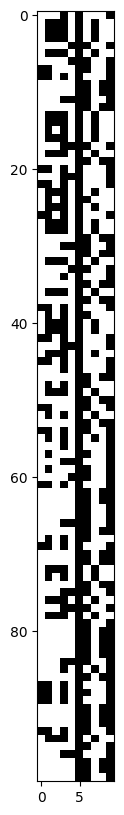

In [22]:
#relu l2
l2_relu = F.relu(l2_out)
# initialisations look heavily weighted to 0, which 
# is possibly going to give us lots of dead Relus!
plt.figure(figsize = (20, 10))
plt.imshow(l2_relu.abs() <= 0 , cmap='gray') # Booleanfrom conditional
l2_relu[0:15], l2_relu.shape, classify_conc_circles.l3.weight.shape

In [23]:
# multiply l3
l3_out = torch.matmul(l2_relu,\
                      torch.transpose(classify_conc_circles.l3.weight, 0 ,1))
l3_out[0:15]

tensor([[-0.1082],
        [ 0.1251],
        [ 0.1225],
        [ 0.0953],
        [-0.0583],
        [ 0.1045],
        [-0.0476],
        [-0.2658],
        [-0.2219],
        [-0.0116],
        [ 0.0739],
        [-0.0356],
        [ 0.0351],
        [ 0.1046],
        [ 0.1222]], grad_fn=<SliceBackward0>)

In [24]:
# add bias l3
l3_out = l3_out + classify_conc_circles.l3.bias
l3_out[0:15]

tensor([[-0.1082],
        [ 0.1251],
        [ 0.1225],
        [ 0.0953],
        [-0.0583],
        [ 0.1045],
        [-0.0476],
        [-0.2658],
        [-0.2219],
        [-0.0116],
        [ 0.0739],
        [-0.0356],
        [ 0.0351],
        [ 0.1046],
        [ 0.1222]], grad_fn=<SliceBackward0>)

In [25]:
# cross check result
Y_logits = classify_conc_circles(X_train[0:100])
Y_logits[0:15]

tensor([[-0.1082],
        [ 0.1251],
        [ 0.1225],
        [ 0.0953],
        [-0.0583],
        [ 0.1045],
        [-0.0476],
        [-0.2658],
        [-0.2219],
        [-0.0116],
        [ 0.0739],
        [-0.0356],
        [ 0.0351],
        [ 0.1046],
        [ 0.1222]], grad_fn=<SliceBackward0>)

In [26]:
# check initialisations 
classify_conc_circles.state_dict()

OrderedDict([('l0.weight',
              tensor([[ 0.1043,  1.0414],
                      [-0.3997, -2.2933],
                      [ 1.1179, -1.2956],
                      [ 0.0503, -0.5855],
                      [-0.3900,  0.0358],
                      [ 0.1206, -0.8057],
                      [ 0.2080, -1.1586],
                      [-0.9637, -0.3750],
                      [ 0.8033, -0.5188],
                      [-1.5013, -1.9267]])),
             ('l0.bias', tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])),
             ('l2.weight',
              tensor([[-0.3516, -0.4277, -0.5579, -0.3354, -0.2648,  0.7935, -0.4121,  0.4304,
                        0.2982, -0.0196],
                      [ 0.1059, -0.3158, -0.3206,  0.2353,  0.9445, -0.2329, -0.0827,  0.4744,
                        0.0932, -0.2584],
                      [ 0.1456, -0.3643, -0.4567, -0.2213, -0.6840,  0.1811,  0.2826,  0.1398,
                       -0.0150, -0.1780],
                      [ 0.4832, -0.7

In [27]:
classify_conc_circles.state_dict()["l2.weight"]

tensor([[-0.3516, -0.4277, -0.5579, -0.3354, -0.2648,  0.7935, -0.4121,  0.4304,
          0.2982, -0.0196],
        [ 0.1059, -0.3158, -0.3206,  0.2353,  0.9445, -0.2329, -0.0827,  0.4744,
          0.0932, -0.2584],
        [ 0.1456, -0.3643, -0.4567, -0.2213, -0.6840,  0.1811,  0.2826,  0.1398,
         -0.0150, -0.1780],
        [ 0.4832, -0.7964, -0.1590,  0.1618,  0.8941,  0.2965,  0.3152, -0.0020,
          0.7454,  0.0688],
        [-0.3506,  0.2268,  0.0367,  0.1986, -0.3238, -0.0322, -0.4052, -0.9162,
          0.1475, -0.4395],
        [ 0.1350,  0.0799, -0.0578, -0.4155,  0.1235, -0.2410,  0.6101,  0.2832,
          0.1811,  0.1528],
        [-0.0990,  0.5614, -0.3197,  0.3819, -0.0346,  0.2874,  0.2568,  0.2624,
         -0.0084, -0.3066],
        [ 0.2520, -0.6740, -0.2366, -0.3601,  0.2307, -0.3188,  0.0982, -0.7150,
         -0.0488,  0.3198],
        [-0.3863,  0.3735, -0.1412,  0.1203,  0.1507,  0.4353, -0.4540, -0.2424,
         -0.1972, -0.1403],
        [-0.0578, -

In [28]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

(torch.Size([800, 2]),
 torch.Size([800]),
 torch.Size([500, 2]),
 torch.Size([500]))

In [29]:
X_train[:10, :], Y_train[:10], X_test[:10, :], Y_test[:10]

(tensor([[ 0.9135,  0.2403],
         [ 0.1049,  1.0081],
         [ 0.1765,  0.9797],
         [ 0.2975,  0.7461],
         [ 0.7584, -0.7182],
         [-0.1536,  0.8157],
         [ 0.5817, -0.5681],
         [-0.9760, -0.0823],
         [-0.9300,  0.0178],
         [-0.7206, -0.4651]]),
 tensor([0., 0., 0., 1., 0., 1., 1., 0., 0., 1.]),
 tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

In [30]:
# Calculate accuracy (a classification metric)
# (number correct predictions)/(total number of preictions)
def calculate_accuracy(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() 
    acc = (correct / len(y_pred)) * 100 
    return acc

In [31]:
# Training


# BCEWithLogitsLoss, below, incorporates a sigmoid layer and then binary cross 
# entropy 
# loss function, which is supposed to be a more numerically stable implementation
# than sigmoid layer and then BCE. 
calculate_loss = torch.nn.modules.loss.BCEWithLogitsLoss() 
optimizer = torch.optim.SGD(params=classify_conc_circles.parameters(), 
                            lr=0.1)

# Put all data on target device
X_train,_train = X_train.to(device), Y_train.to(device)
X_val, Y_val = X_val.to(device), Y_val.to(device)

# lists to store progress
epochs = 3000
train_loss_values = []
validation_loss_values = []
epoch_count = []

for epoch in range(epochs):
  #forward through network, but not final prediction. 
  Y_logits = classify_conc_circles(X_train).squeeze() 
  # apply the missing sigmoid layer to turn logits 
  # into "probabilities" and round up or down to 1 or 0 to get 
  # predicted lable. I.e. >= 0.5 prediction is 1, otherwise 0
  Y_pred_train = torch.round(torch.sigmoid(Y_logits)) 

  # 2. Calculate loss and accuracy
   # BCEWithLogitsLoss calculates loss using logits
  loss = calculate_loss(Y_logits, Y_train)
  accuracy = calculate_accuracy(Y_train, 
                                Y_pred_train)
  
  train_loss_values.append(loss.detach().item())
  epoch_count.append(epoch)

  ### validation set metrics prior to back prop.
  classify_conc_circles.eval()
  with torch.inference_mode():
    # 1. Forward pass
    logits = classify_conc_circles(X_val).squeeze() 
    Y_pred_val = torch.round(torch.sigmoid(logits))
    # 2. Caculate loss/accuracy
    validation_loss = calculate_loss(logits,
                        Y_pred_val)
    validation_acc = calculate_accuracy(Y_val,
                            Y_pred_val)

    validation_loss_values.append(validation_loss)
    # Print out what's happening every 50 epochs
    if epoch % 50 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {accuracy:.2f}%\
         | Validation loss: {validation_loss:.5f},\
          Test acc: {validation_acc:.2f}%")
    
  # 3. back propagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # 5. Final loss
classify_conc_circles.eval()
with torch.inference_mode():
  # 5.1. Forward pass validation
  validation_logits = classify_conc_circles(X_val).squeeze() 
  validation_pred = torch.round(torch.sigmoid(logits))
  # 5.2. Calculate test loss and accuracy
  validation_loss_values.append(validation_loss)
  validation_acc = calculate_accuracy(Y_val,
                            Y_pred_val)
  # 5.3. Forward pass with training data
  Y_logits = classify_conc_circles(X_train).squeeze()
  Y_pred_train = torch.round(torch.sigmoid(Y_logits))
  loss = calculate_loss(Y_logits, Y_train)
  accuracy = calculate_accuracy(Y_train, 
                                Y_pred_train)
  train_loss_values.append(loss.detach().item())
  epoch_count.append(epoch)

print(f"Final model losses/accuracies. | Loss: {loss:.5f}, Accuracy: {accuracy:.2f}%\
         | Validation loss: {validation_loss:.5f},\
          Test acc: {validation_acc:.2f}%")



Epoch: 0 | Loss: 0.69485, Accuracy: 48.88%         | Validation loss: 0.64608,          Test acc: 49.80%
Epoch: 50 | Loss: 0.68229, Accuracy: 51.50%         | Validation loss: 0.60917,          Test acc: 52.00%
Epoch: 100 | Loss: 0.67033, Accuracy: 55.25%         | Validation loss: 0.60909,          Test acc: 56.20%
Epoch: 150 | Loss: 0.65644, Accuracy: 59.25%         | Validation loss: 0.60870,          Test acc: 59.20%
Epoch: 200 | Loss: 0.63998, Accuracy: 72.88%         | Validation loss: 0.60399,          Test acc: 71.60%
Epoch: 250 | Loss: 0.61802, Accuracy: 79.38%         | Validation loss: 0.59200,          Test acc: 79.00%
Epoch: 300 | Loss: 0.58899, Accuracy: 86.00%         | Validation loss: 0.57048,          Test acc: 85.80%
Epoch: 350 | Loss: 0.55061, Accuracy: 90.38%         | Validation loss: 0.53613,          Test acc: 91.00%
Epoch: 400 | Loss: 0.50233, Accuracy: 95.25%         | Validation loss: 0.48806,          Test acc: 95.80%
Epoch: 450 | Loss: 0.44446, Accuracy: 96

In [32]:
epoch_count[:10], len(epoch_count), len(validation_loss_values)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 3001, 3001)

In [33]:
train_loss_values[:10], len(train_loss_values)

([0.6948545575141907,
  0.6940175890922546,
  0.6933338046073914,
  0.6927669048309326,
  0.692294180393219,
  0.6918891072273254,
  0.6915329098701477,
  0.691211998462677,
  0.690917432308197,
  0.6906452775001526],
 3001)

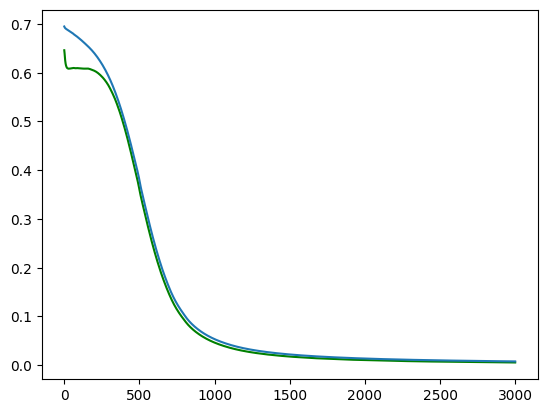

In [34]:
import matplotlib.pyplot as plt
plt.plot(epoch_count, validation_loss_values, c="g")
plt.plot(epoch_count, train_loss_values)

In [35]:
# make a grid of input data to feed to the network.
# the output will form the basis of the contour plot.
# our circle data has range -1 to +1 along the axes
import numpy as np
#xx, yy = np.mgrid[-1.0:1.0:.01, -1.0:1.0:.01]
# Generate a grid of points over the input space
x_min, x_max = -2, 2
y_min, y_max = -2, 2
step = 0.05
# matrices for coordinates on the grid, taking x from xx, y from yy.
xx, yy = \
       np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
grid = np.c_[xx.ravel(), yy.ravel()]



In [36]:
  classify_conc_circles.eval()
  with torch.inference_mode():
    # 1. Forward pass
    #X_test = torch.FloatTensor(grid).to(device)
    X_for_contours = torch.tensor(grid).type('torch.FloatTensor').to(device)
    logits = classify_conc_circles(X_for_contours)

In [37]:
len(logits), len(xx), xx.shape, len(torch.sigmoid(logits)), len(torch.sigmoid(logits).numpy())

(6400, 80, (80, 80), 6400, 6400)

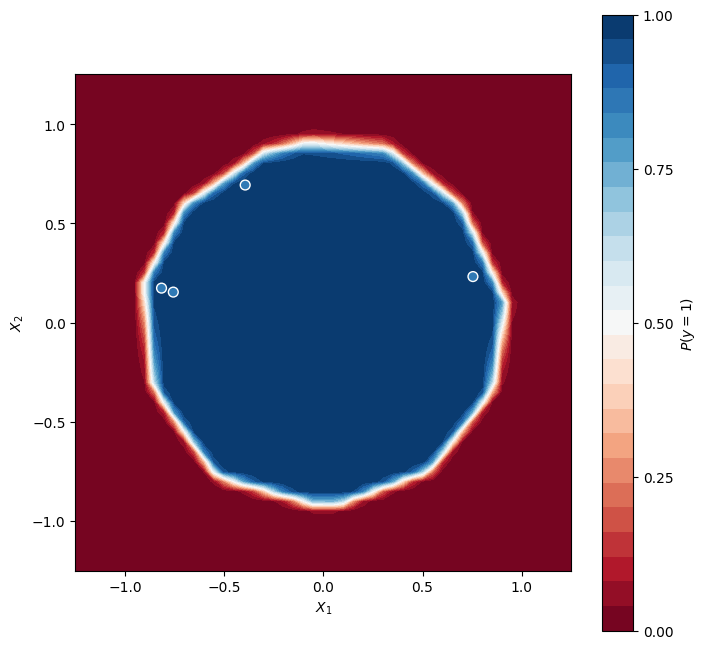

tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        [-0.3937,  0.6929]]) tensor([1., 1., 1., 1.])


In [38]:

probs = torch.sigmoid(logits).to(device).numpy()
Z = probs.reshape(xx.shape)

'''
# Plot the decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
plt.colorbar()
plt.show()
'''


f, ax = plt.subplots(figsize=(8, 8))
contour = ax.contourf(xx, yy, Z, 25, cmap="RdBu",
                      vmin=0, vmax=1)

ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[:4,0], X[:4, 1], c=Y[:4], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",\
       xlim=(-1.25, 1.25), ylim=(-1.25, 1.25),\
       xlabel="$X_1$", ylabel="$X_2$")
plt.show()

# double check which data labelled 1 and which labelled 0 
print(X[:4,:], Y[:4])

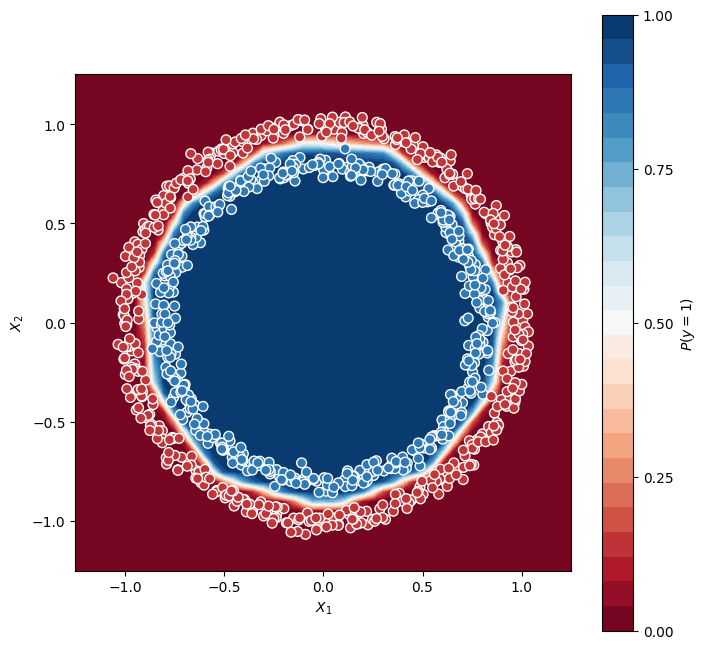

In [39]:
f, ax = plt.subplots(figsize=(8, 8))
contour = ax.contourf(xx, yy, Z, 25, cmap="RdBu",
                      vmin=0, vmax=1)

ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[:,0], X[:, 1], c=Y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",\
       xlim=(-1.25, 1.25), ylim=(-1.25, 1.25),\
       xlabel="$X_1$", ylabel="$X_2$")
plt.show()
